<a href="https://colab.research.google.com/github/Bala-mani-sankar-dharmavarapu/spam-classifier/blob/main/spam_email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

label
0    4825
1     747
Name: count, dtype: int64
Accuracy: 0.9596412556053812
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       1.00      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



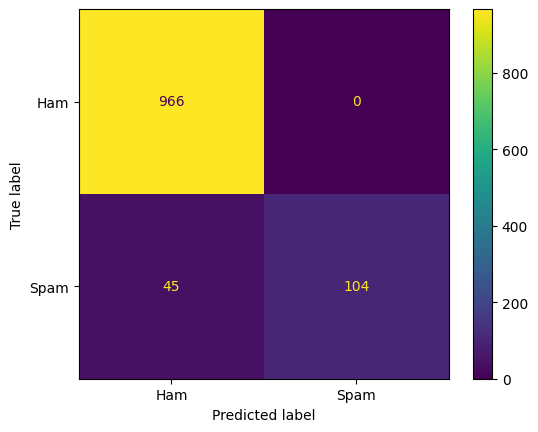

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import string
import re

def clean_text(text):
  text=text.lower()
  text=re.sub(r'\d+','',text)
  text=text.translate(str.maketrans('','',string.punctuation))
  text=re.sub(r'\s+',' ',text).strip()
  return text

# Load data
url="https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data=pd.read_csv(url,sep='\t',header=None,names=["label","message"])

data['label']=data['label'].map({'ham':0,'spam':1})
data['clean_message']=data['message'].apply(clean_text)
data[['message','clean_message']].head()


# print("Data sets size",data.shape)
print(data["label"].value_counts())
# data["label"].value_counts().plot(kind="bar",title="Spam vs Ham Distribution")
data['message'].sample(5)
vectorizer=TfidfVectorizer(stop_words="english",ngram_range=(1,2))
X=vectorizer.fit_transform(data['message'])

y=data['label']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape

# Train model
model = MultinomialNB()
model.fit(X_train,y_train)

predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)

cm=confusion_matrix(y_test,predictions)
dsip=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Ham","Spam"])
print("Accuracy:", accuracy)
dsip.plot()

print(classification_report(y_test, predictions, target_names=["Ham", "Spam"]))




## 🧠 Final Summary

This project was my first introduction to text classification using NLP.

**What I did:**
- Preprocessed raw SMS messages (lowercased, removed punctuation/numbers)
- Converted text into numerical features using TF-IDF
- Trained a Naive Bayes classifier
- Achieved ~X% accuracy on the test set
- Improved performance using n-grams and cleaning

**What I learned:**
- How to handle real-world text data
- Why TF-IDF is important in NLP
- Why recall matters more than just accuracy in spam detection
- How cleaning impacts model quality

This project built my foundation in NLP and ML. Excited to move on to the next one!
